<a id="1"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Impact of bike lines in Guadalajara</h2>
</div>

<a id="2"></a>
<div class="alert alert-block alert-success">
    <h3 style="text-align: left; color: black;">Introduction</h3>
    <p>
        This project analyzes the Guadalajara's population within the 2020 federal census. Using pandas and numpy, I process the main csv file in order to get the principal archive to analyse. The dataset was gotten from https://www.inegi.org.mx/contenidos/programas/ccpv/2020/datosabiertos/ageb_manzana/ageb_mza_urbana_14_cpv2020_csv.zip
        <hr>and:
        https://www.inegi.org.mx/contenidos/productos/prod_serv/contenidos/espanol/bvinegi/productos/geografia/CGURA_Junio2016/Jalisco/702825218812_s.zip
    </p>
</div>

<a id="4"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 1: Import Libraries 🛠️</h2>
</div>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import requests
import folium
import json
import pyogrio
from branca.colormap import linear

<a id="4"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 2: Data Loading 🛠️</h2>
</div>

In [7]:
current_dir = os.getcwd()
print("Directorio actual:", current_dir)
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
print("Directorio superior:", parent_dir)
print("Current Working Directory:", os.getcwd())
os.chdir(parent_dir)

Directorio actual: /Users/edflour/Documents/GitHub/bikeways/notebooks
Directorio superior: /Users/edflour/Documents/GitHub/bikeways
Current Working Directory: /Users/edflour/Documents/GitHub/bikeways/notebooks


In [8]:
print("Nuevo directorio actual:", os.getcwd())

Nuevo directorio actual: /Users/edflour/Documents/GitHub/bikeways


In [103]:
raw_dir = 'DATA/raw/INEGI'
csv_file = os.path.join(raw_dir, "conjunto_de_datos_ageb_urbana_14_cpv2020.csv")

# Load into DataFrame
df = pd.read_csv(csv_file, encoding="latin1")  
print("Data loaded. Shape:", df.shape)

# Display the first few rows to understand its structure
df.head()


Data loaded. Shape: (108041, 230)


,ENTIDAD,NOM_ENT,MUN,NOM_MUN,LOC,NOM_LOC,AGEB,MZA,POBTOT,POBFEM,...,VPH_TELEF,VPH_CEL,VPH_INTER,VPH_STVP,VPH_SPMVPI,VPH_CVJ,VPH_SINRTV,VPH_SINLTC,VPH_SINCINT,VPH_SINTIC
0,14,Jalisco,0,Total de la entidad Jalisco,0,Total de la entidad,0000,0,8348151,4249696.0,...,1009963,2134429.0,1437473,1199700,573528,375678,56399,96948,760439,17553
1,14,Jalisco,1,Acatic,0,Total del municipio,0000,0,23175,11792.0,...,1358,5801.0,2877,3585,482,464,121,310,3193,40
2,14,Jalisco,1,Acatic,1,Total de la localidad urbana,0000,0,13033,6697.0,...,985,3293.0,1940,2530,387,318,54,161,1545,17
3,14,Jalisco,1,Acatic,1,Total AGEB urbana,0067,0,1266,639.0,...,73,313.0,189,246,33,30,9,13,133,*
4,14,Jalisco,1,Acatic,1,Acatic,0067,1,21,12.0,...,*,3.0,3,3,*,3,0,0,0,0


In [104]:

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Shape: (108041, 230)

First few rows:
   ENTIDAD  NOM_ENT  MUN                      NOM_MUN  LOC  \
0       14  Jalisco    0  Total de la entidad Jalisco    0   
1       14  Jalisco    1                       Acatic    0   
2       14  Jalisco    1                       Acatic    1   
3       14  Jalisco    1                       Acatic    1   
4       14  Jalisco    1                       Acatic    1   

                        NOM_LOC  AGEB  MZA   POBTOT     POBFEM  ...  \
0           Total de la entidad  0000    0  8348151  4249696.0  ...   
1           Total del municipio  0000    0    23175    11792.0  ...   
2  Total de la localidad urbana  0000    0    13033     6697.0  ...   
3             Total AGEB urbana  0067    0     1266      639.0  ...   
4                        Acatic  0067    1       21       12.0  ...   

   VPH_TELEF    VPH_CEL VPH_INTER VPH_STVP  VPH_SPMVPI  VPH_CVJ  VPH_SINRTV  \
0    1009963  2134429.0   1437473  1199700      573528   375678       56399

<a id="4"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 3: Data Preprocessing 🛠️</h2>
</div>

In [105]:
# To get the list of all columns
# Print the list of columns
print(df.columns.tolist())

# Alternatively, for a more readable format
for col in df:
    print(col)

['ENTIDAD', 'NOM_ENT', 'MUN', 'NOM_MUN', 'LOC', 'NOM_LOC', 'AGEB', 'MZA', 'POBTOT', 'POBFEM', 'POBMAS', 'P_0A2', 'P_0A2_F', 'P_0A2_M', 'P_3YMAS', 'P_3YMAS_F', 'P_3YMAS_M', 'P_5YMAS', 'P_5YMAS_F', 'P_5YMAS_M', 'P_12YMAS', 'P_12YMAS_F', 'P_12YMAS_M', 'P_15YMAS', 'P_15YMAS_F', 'P_15YMAS_M', 'P_18YMAS', 'P_18YMAS_F', 'P_18YMAS_M', 'P_3A5', 'P_3A5_F', 'P_3A5_M', 'P_6A11', 'P_6A11_F', 'P_6A11_M', 'P_8A14', 'P_8A14_F', 'P_8A14_M', 'P_12A14', 'P_12A14_F', 'P_12A14_M', 'P_15A17', 'P_15A17_F', 'P_15A17_M', 'P_18A24', 'P_18A24_F', 'P_18A24_M', 'P_15A49_F', 'P_60YMAS', 'P_60YMAS_F', 'P_60YMAS_M', 'REL_H_M', 'POB0_14', 'POB15_64', 'POB65_MAS', 'PROM_HNV', 'PNACENT', 'PNACENT_F', 'PNACENT_M', 'PNACOE', 'PNACOE_F', 'PNACOE_M', 'PRES2015', 'PRES2015_F', 'PRES2015_M', 'PRESOE15', 'PRESOE15_F', 'PRESOE15_M', 'P3YM_HLI', 'P3YM_HLI_F', 'P3YM_HLI_M', 'P3HLINHE', 'P3HLINHE_F', 'P3HLINHE_M', 'P3HLI_HE', 'P3HLI_HE_F', 'P3HLI_HE_M', 'P5_HLI', 'P5_HLI_NHE', 'P5_HLI_HE', 'PHOG_IND', 'POB_AFRO', 'POB_AFRO_F', 'PO

### Categories for the Explotatory Data Analysis

To the purpose of the analysis, we consider the next columns and categories:

1. Mobility-Related Indicators
    - VPH_BICI: Households with bicycles used for transportation (direct proxy for cycling infrastructure demand).
    - VPH_NDACMM: Households without cars/motorcycles (indicates reliance on non-motorized transport).
    - VPH_AUTOM: Households with cars (inverse relationship with cycling).
    - VPH_MOTO: Households with motorcycles (alternative motorized transport).

2. Socioeconomic Factors
    - GRAPROES: Average years of education (education correlates with cycling adoption).
    - PEA: Economically active population (commuter behavior).
    - POCUPADA: Employed population (work commute patterns).
    - P15YM_SE: Population without formal education (proxy for income/access).
    - VPH_C_SERV: Households with basic services (water, electricity, drainage) – proxy for socioeconomic status.
    - VPH_SNBIEN: Households without appliances (poverty indicator).

3. Demographic Variables
    - P_18A24: Population aged 18-24 (young adults more likely to cycle).
    - P_60YMAS: Elderly population (may influence cycling infrastructure needs).
    - REL_H_M: Gender ratio (to analyze gender disparities in cycling).

4. Geospatial Identifiers
    - ENTIDAD, MUN, LOC, AGEB, MZA: Geographic codes for merging with bikeway spatial data.


In [106]:
# Filter the DataFrame to include only rows where:
# - The 'MUN' column value is 39 (municipality code for Guadalajara)
# - The 'LOC' column value is not 0 (excluding total counts)
# - The 'NOM_LOC' column value is "Guadalajara" (excluding total counts references)
# Define the interested columns for the analysis

columns_needed = ['ENTIDAD','MUN','LOC','AGEB','MZA','NOM_LOC','GRAPROES','PEA','POCUPADA','P15YM_SE','VPH_C_SERV','VPH_SNBIEN','P_18A24','P_60YMAS','REL_H_M','POBTOT','TOTHOG','POBHOG','VIVPAR_HAB','VPH_NDACMM','VPH_AUTOM','VPH_MOTO','VPH_BICI'] 
filtered_df = df[(df['MUN'] == 39) & (df['LOC'] != 0) & (df['NOM_LOC'] == "Guadalajara")]
filtered_df = filtered_df[columns_needed]
df = filtered_df

df.head()
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 13791 entries, 16178 to 30409
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ENTIDAD     13791 non-null  int64  
 1   MUN         13791 non-null  int64  
 2   LOC         13791 non-null  int64  
 3   AGEB        13791 non-null  object 
 4   MZA         13791 non-null  int64  
 5   NOM_LOC     13791 non-null  object 
 6   GRAPROES    13462 non-null  float64
 7   PEA         13449 non-null  float64
 8   POCUPADA    13448 non-null  float64
 9   P15YM_SE    13791 non-null  object 
 10  VPH_C_SERV  13444 non-null  float64
 11  VPH_SNBIEN  13791 non-null  object 
 12  P_18A24     13791 non-null  object 
 13  P_60YMAS    13791 non-null  object 
 14  REL_H_M     13451 non-null  float64
 15  POBTOT      13791 non-null  int64  
 16  TOTHOG      13454 non-null  float64
 17  POBHOG      13460 non-null  float64
 18  VIVPAR_HAB  13331 non-null  float64
 19  VPH_NDACMM  13

In [107]:
df.head()

,ENTIDAD,MUN,LOC,AGEB,MZA,NOM_LOC,GRAPROES,PEA,POCUPADA,P15YM_SE,...,P_60YMAS,REL_H_M,POBTOT,TOTHOG,POBHOG,VIVPAR_HAB,VPH_NDACMM,VPH_AUTOM,VPH_MOTO,VPH_BICI
16178,14,39,1,0026,1,Guadalajara,15.28,54.0,52.0,0,...,23,91.84,94,26.0,94.0,25.0,0,26.0,*,9
16179,14,39,1,0026,2,Guadalajara,14.88,421.0,415.0,*,...,162,75.44,700,252.0,643.0,213.0,12,240.0,24,54
16180,14,39,1,0026,3,Guadalajara,14.77,63.0,62.0,*,...,23,79.37,113,42.0,113.0,41.0,*,38.0,*,11
16181,14,39,1,0026,4,Guadalajara,15.55,71.0,70.0,0,...,31,89.66,110,44.0,110.0,37.0,*,43.0,4,9
16182,14,39,1,0026,5,Guadalajara,14.53,22.0,22.0,0,...,8,112.50,34,11.0,34.0,11.0,0,10.0,4,*


Due to the table presents an inconsistency, it is necessary to uniform number columns and string columns as well

In [110]:
# Attempt to convert 'VPH_MOTO' and 'VPH_BICI' to numeric types
cols_to_convert = ['VPH_MOTO', 'VPH_BICI','P15YM_SE','VPH_SNBIEN','P_18A24','P_60YMAS']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Attempt to convert 'POBTOT' and 'VPH_NDACMM' to float types
df['POBTOT'] = df['POBTOT'].astype(float)

df['VPH_NDACMM'] = df['VPH_NDACMM'].astype(str).str.replace(r'\D', '', regex=True)
df['VPH_NDACMM'] = pd.to_numeric(df['VPH_NDACMM'], errors='coerce')


# Attempt to convert 'ENTIDAD' to string types
df['ENTIDAD'] = df['ENTIDAD'].astype(str)

#Creating a georeference column: 
def convert_numbers(df,strLong):
    for column, long in strLong.items():
        df[column]=df[column].astype(str).str.zfill(long)
    return df

gloss_col = {'MUN':3, 'LOC':4, 'MZA':3}

df=convert_numbers(df,gloss_col)


# Identify columns with int64 type
int64_cols = df.select_dtypes(include=['int64']).columns

# Convert int64 columns to float64
df[int64_cols] = df[int64_cols].astype('float64')

# Identify columns with object type
object_cols = df.select_dtypes(include=['object']).columns

# Convert object to string columns
df[object_cols] = df[object_cols].astype('string')

# Check the dataset info after conversion
df.head()
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 13791 entries, 16178 to 30409
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ENTIDAD     13791 non-null  string 
 1   MUN         13791 non-null  string 
 2   LOC         13791 non-null  string 
 3   AGEB        13791 non-null  string 
 4   MZA         13791 non-null  string 
 5   NOM_LOC     13791 non-null  string 
 6   GRAPROES    13462 non-null  float64
 7   PEA         13449 non-null  float64
 8   POCUPADA    13448 non-null  float64
 9   P15YM_SE    9475 non-null   float64
 10  VPH_C_SERV  13444 non-null  float64
 11  VPH_SNBIEN  13066 non-null  float64
 12  P_18A24     12640 non-null  float64
 13  P_60YMAS    13060 non-null  float64
 14  REL_H_M     13451 non-null  float64
 15  POBTOT      13791 non-null  float64
 16  TOTHOG      13454 non-null  float64
 17  POBHOG      13460 non-null  float64
 18  VIVPAR_HAB  13331 non-null  float64
 19  VPH_NDACMM  12

In [111]:
#Saving the new csv file:
processed_dir = 'DATA/processed'
guadalajara_geokey = os.path.join(processed_dir, "guadalajara.csv")
df.to_csv(guadalajara_geokey, index=False)
print(f"Dataframe saved to: {guadalajara_geokey}")

Dataframe saved to: DATA/processed/guadalajara.csv


In order to get the goereferencial code, it is necesary to create a new column where we can merge all geographical references into a key. 

In [112]:
df.head()

,ENTIDAD,MUN,LOC,AGEB,MZA,NOM_LOC,GRAPROES,PEA,POCUPADA,P15YM_SE,...,P_60YMAS,REL_H_M,POBTOT,TOTHOG,POBHOG,VIVPAR_HAB,VPH_NDACMM,VPH_AUTOM,VPH_MOTO,VPH_BICI
16178,14,039,0001,0026,001,Guadalajara,15.28,54.0,52.0,0.0,...,23.0,91.84,94.0,26.0,94.0,25.0,0.0,26.0,NaN,9.0
16179,14,039,0001,0026,002,Guadalajara,14.88,421.0,415.0,NaN,...,162.0,75.44,700.0,252.0,643.0,213.0,12.0,240.0,24.0,54.0
16180,14,039,0001,0026,003,Guadalajara,14.77,63.0,62.0,NaN,...,23.0,79.37,113.0,42.0,113.0,41.0,NaN,38.0,NaN,11.0
16181,14,039,0001,0026,004,Guadalajara,15.55,71.0,70.0,0.0,...,31.0,89.66,110.0,44.0,110.0,37.0,NaN,43.0,4.0,9.0
16182,14,039,0001,0026,005,Guadalajara,14.53,22.0,22.0,0.0,...,8.0,112.50,34.0,11.0,34.0,11.0,0.0,10.0,4.0,NaN


In [113]:

#Merge the converted columns in a geokey:
df['ClaveGeo'] = df[['ENTIDAD', 'MUN', 'LOC', 'AGEB', 'MZA']].agg(''.join, axis=1)

# Drop the unnecessary columns
df.head()
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 13791 entries, 16178 to 30409
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ENTIDAD     13791 non-null  string 
 1   MUN         13791 non-null  string 
 2   LOC         13791 non-null  string 
 3   AGEB        13791 non-null  string 
 4   MZA         13791 non-null  string 
 5   NOM_LOC     13791 non-null  string 
 6   GRAPROES    13462 non-null  float64
 7   PEA         13449 non-null  float64
 8   POCUPADA    13448 non-null  float64
 9   P15YM_SE    9475 non-null   float64
 10  VPH_C_SERV  13444 non-null  float64
 11  VPH_SNBIEN  13066 non-null  float64
 12  P_18A24     12640 non-null  float64
 13  P_60YMAS    13060 non-null  float64
 14  REL_H_M     13451 non-null  float64
 15  POBTOT      13791 non-null  float64
 16  TOTHOG      13454 non-null  float64
 17  POBHOG      13460 non-null  float64
 18  VIVPAR_HAB  13331 non-null  float64
 19  VPH_NDACMM  12

In [114]:
#Saving the new csv file:
processed_dir = 'DATA/processed'
guadalajara_geokey = os.path.join(processed_dir, "guadalajara_geokey.csv")
df.to_csv(guadalajara_geokey, index=False)
print(f"Dataframe saved to: {guadalajara_geokey}")

Dataframe saved to: DATA/processed/guadalajara_geokey.csv


<a id="5"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 4: Exploratory Data Analysis</h2>
</div>

### 0. Creating a glossary table

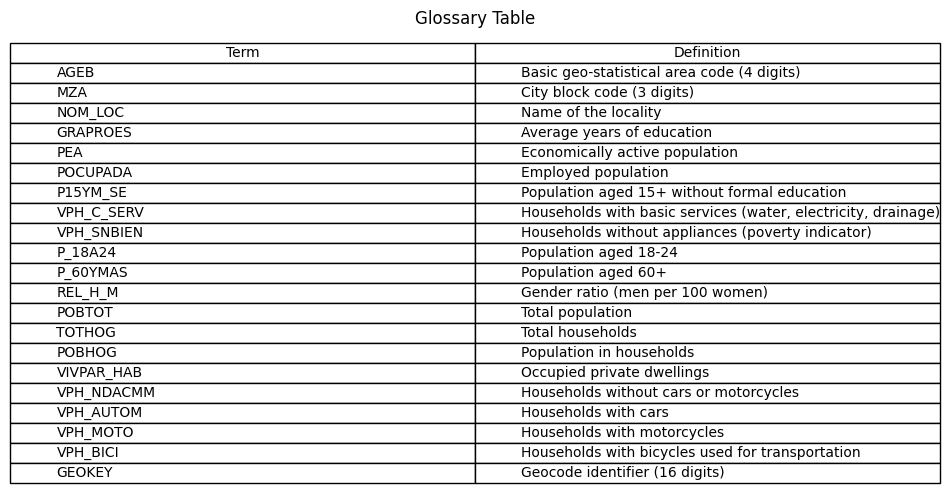

In [142]:
glossary = {   
    "AGEB": "Basic geo-statistical area code (4 digits)",
    "MZA": "City block code (3 digits)",
    "NOM_LOC": "Name of the locality",
    "GRAPROES": "Average years of education",
    "PEA": "Economically active population",
    "POCUPADA": "Employed population",
    "P15YM_SE": "Population aged 15+ without formal education",
    "VPH_C_SERV": "Households with basic services (water, electricity, drainage)",
    "VPH_SNBIEN": "Households without appliances (poverty indicator)",
    "P_18A24": "Population aged 18-24",
    "P_60YMAS": "Population aged 60+",
    "REL_H_M": "Gender ratio (men per 100 women)",
    "POBTOT": "Total population",
    "TOTHOG": "Total households",
    "POBHOG": "Population in households",
    "VIVPAR_HAB": "Occupied private dwellings",
    "VPH_NDACMM": "Households without cars or motorcycles",
    "VPH_AUTOM": "Households with cars",
    "VPH_MOTO": "Households with motorcycles",
    "VPH_BICI": "Households with bicycles used for transportation",
    "GEOKEY":"Geocode identifier (16 digits)"
}

# Convert glossary dictionary to a list of tuples
glossary_items = list(glossary.items())

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Hide axes
ax.axis('off')

# Create the table
cell_colors = [['#f7f7f7', '#e8e8e8'] * len(glossary_items)]
table = ax.table(
    cellText=glossary_items,  # Data for the table
    colLabels=["Term", "Definition"],  # Column headers
    loc='center',  # Position the table in the center
    cellLoc='left'  # Align text to the left
)

# Adjust table style
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Scale the table size

# Save the table as an image
plt.savefig("glossary_table.png", bbox_inches='tight', dpi=300)
plt.title('Glossary Table')
plt.show()


### 1.  Handle Missing Values


In [115]:
# Count missing values in each column
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
ENTIDAD          0
MUN              0
LOC              0
AGEB             0
MZA              0
NOM_LOC          0
GRAPROES       329
PEA            342
POCUPADA       343
P15YM_SE      4316
VPH_C_SERV     347
VPH_SNBIEN     725
P_18A24       1151
P_60YMAS       731
REL_H_M        340
POBTOT           0
TOTHOG         337
POBHOG         331
VIVPAR_HAB     460
VPH_NDACMM    1405
VPH_AUTOM      694
VPH_MOTO      4623
VPH_BICI      2241
ClaveGeo         0
dtype: int64


In [116]:
# Calculate missing values and percentages
missing_counts = df.isnull().sum()  # Count of missing values per column
total_rows = len(df)  # Total number of rows in the DataFrame
missing_percentages = (missing_counts / total_rows) * 100  # Percentage of missing values

# Create a DataFrame to display missing data
missing_data = pd.DataFrame({
    'MissingValues': missing_counts,
    'Percentage': missing_percentages
})

# Format the percentage to two decimal places
missing_data['Percentage'] = missing_data['Percentage'].round(2)

# Sort by percentage of missing values in descending order
missing_data = missing_data.sort_values(by='Percentage', ascending=False)

# Add a column to indicate if a column has any missing values
missing_data['HasMissing'] = missing_data['MissingValues'] > 0

# Display the missing data information
print("Percentage of Missing Values per Column:")
print(missing_data)

# Optional: Highlight columns with significant missing data (e.g., > 50%)
significant_missing = missing_data[missing_data['Percentage'] > 50]
if not significant_missing.empty:
    print("\nColumns with significant missing values (> 50%):")
    print(significant_missing)
else:
    print("\nNo columns have significant missing values (> 50%).")

Percentage of Missing Values per Column:
            MissingValues  Percentage  HasMissing
VPH_MOTO             4623       33.52        True
P15YM_SE             4316       31.30        True
VPH_BICI             2241       16.25        True
VPH_NDACMM           1405       10.19        True
P_18A24              1151        8.35        True
P_60YMAS              731        5.30        True
VPH_SNBIEN            725        5.26        True
VPH_AUTOM             694        5.03        True
VIVPAR_HAB            460        3.34        True
VPH_C_SERV            347        2.52        True
POCUPADA              343        2.49        True
PEA                   342        2.48        True
REL_H_M               340        2.47        True
TOTHOG                337        2.44        True
POBHOG                331        2.40        True
GRAPROES              329        2.39        True
ENTIDAD                 0        0.00       False
POBTOT                  0        0.00       False
MUN      

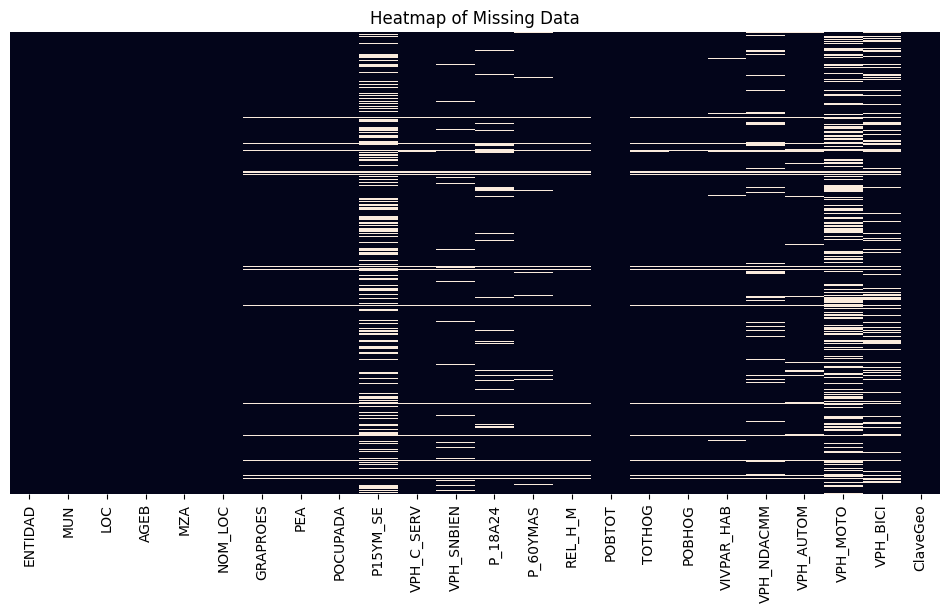

In [117]:
# Visualize missing data as a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)
plt.title('Heatmap of Missing Data')
plt.show()

In [125]:
missing = df[["VPH_BICI", "GRAPROES", "VPH_AUTOM"]].isnull().sum()
print(missing)

VPH_BICI     2241
GRAPROES      329
VPH_AUTOM     694
dtype: int64


### 2. Feature Engineering

#### Bicycle-to-car ratio

In [118]:
df["BICYCLE_CAR_RATIO"] = df["VPH_BICI"] / (df["VPH_AUTOM"] + 1e-6)  # Avoid division by zero

#### Education vs. cycling

Text(0.5, 1.0, 'Education vs. cycling')

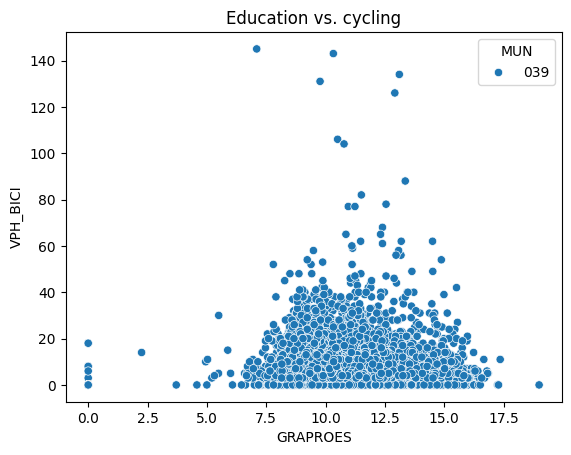

In [172]:
sns.scatterplot(data=df, x="GRAPROES", y="VPH_BICI", hue="MUN")
plt.title("Education vs. cycling")

#### Households without cars nor motorcycle vs. cycling

Text(0.5, 1.0, 'Households without cars nor motorcycle vs. cycling')

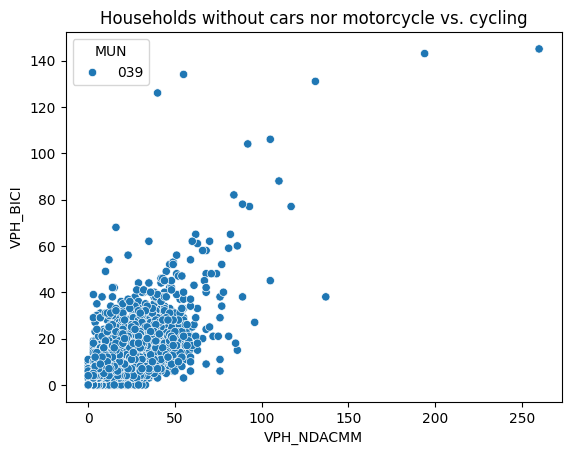

In [170]:
sns.scatterplot(data=df, x="VPH_NDACMM", y="VPH_BICI", hue="MUN")
plt.title("Households without cars nor motorcycle vs. cycling")

### Households with cars vs. scholar grade

Text(0.5, 1.0, 'Households with cars vs. scholar grade')

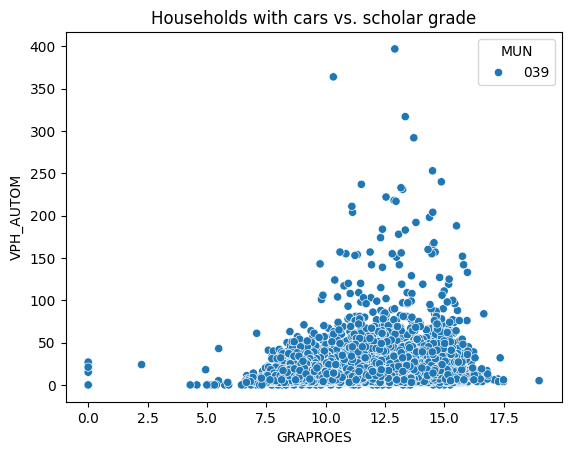

In [169]:
sns.scatterplot(data=df, x="GRAPROES", y="VPH_AUTOM", hue="MUN")
plt.title("Households with cars vs. scholar grade")

#### Car-free households:



In [121]:
df["CAR_FREE"] = df["VPH_NDACMM"] / df["VIVPAR_HAB"]  # % of households without cars

### 3. Spatial Aggregation by AGEB

In [159]:
df_ageb = df.groupby("AGEB").agg(
    Bicycle_HH=("VPH_BICI", "sum"),
    Car_HH=("VPH_AUTOM", "sum"),
    Avg_Education=("GRAPROES", "mean"),
    Total_Households=("VIVPAR_HAB", "sum")  
).reset_index()

### 4. Normalization

In [155]:
df_ageb["BICYCLE_RATE"] = (df_ageb["Bicycle_HH"] / df_ageb["Total_Households"]) * 1000

### 5. Correlation analysis
Identify relationships between cycling and socioeconomic factors:



Text(0.5, 1.0, 'Correlation Heatmap')

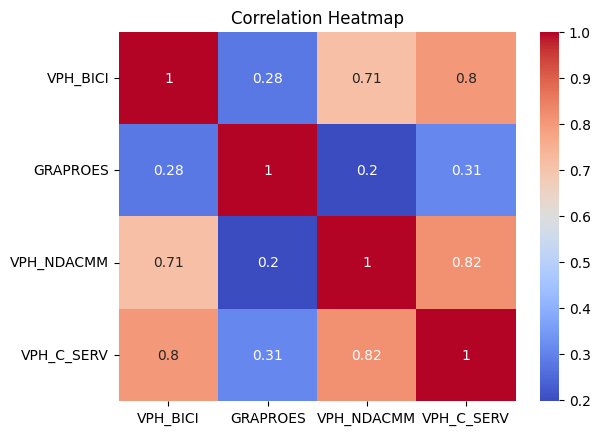

In [168]:
corr_matrix = df[["VPH_BICI", "GRAPROES", "VPH_NDACMM", "VPH_C_SERV"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

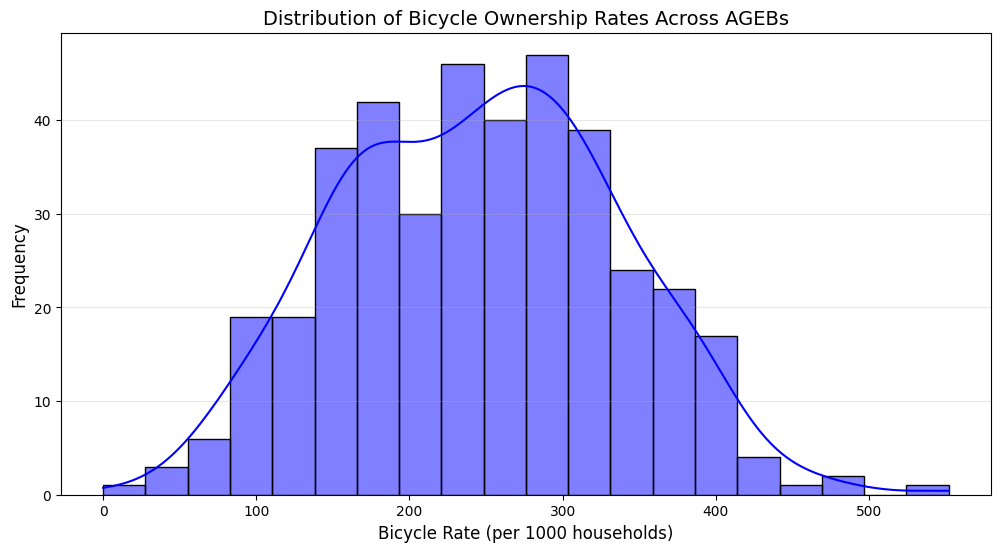

In [166]:
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_ageb,
    x="BICYCLE_RATE",
    bins=20,        # Adjust bin count as needed
    kde=True,       # Add kernel density estimate
    color='blue'    # Customize color
)

plt.title('Distribution of Bicycle Ownership Rates Across AGEBs', fontsize=14)
plt.xlabel('Bicycle Rate (per 1000 households)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

<a id="6"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 5: Data Analysis</h2>
</div>

### Calculating the bike dependecy

In [174]:
df["Bike_Dependent"] = df["BICYCLE_CAR_RATIO"].apply(lambda x: "High" if x > 1 else "Low")
df.groupby("Bike_Dependent")["BICYCLE_CAR_RATIO"].describe()


,count,mean,std,min,25%,50%,75%,max
Bike_Dependent,,,,,,,,
High,655.0,79390.613693,681641.771957,1.019231,1.120606,1.222222,1.375,11000000.0
Low,10714.0,0.405250,0.281726,0.000000,0.195759,0.400000,0.600,1.0


<a id="7"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 6: GeoDataFrame Preprocessing</h2>
</div>

In [167]:

# Load Guadalajara shapefile
shapefile_path = "DATA/raw/shp/14m.shp"
gdl_gdf = gpd.read_file(shapefile_path)

gdl_gdf.head()

NameError: name 'gpd' is not defined

In [13]:

print("Dataset Shape:", gdl_gdf.shape)
print("\nFirst few rows:")
print(gdl_gdf.head())
print("\nData Info:")
print(gdl_gdf.info())
print("\nMissing Values:")
print(gdl_gdf.isnull().sum())

Dataset Shape: (128218, 7)

First few rows:
  CVE_ENT CVE_MUN CVE_LOC CVE_AGEB CVE_MZA           TIPOMZA  \
0      14     050    0003     0019     800  Caserío Disperso   
1      14     045    0151     0019     800  Caserío Disperso   
2      14     101    0188     1963     800  Caserío Disperso   
3      14     020    0035     0024     800  Caserío Disperso   
4      14     029    0005     002A     800  Caserío Disperso   

                                            geometry  
0  MULTIPOLYGON (((2345449.555 928053.222, 234543...  
1  MULTIPOLYGON (((2371526.144 1002845.26, 237153...  
2  MULTIPOLYGON (((2369122.642 966355.674, 236913...  
3  MULTIPOLYGON (((2134001.349 942241.808, 213401...  
4  MULTIPOLYGON (((2393488.016 1006158.424, 23934...  

Data Info:
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 128218 entries, 0 to 128217
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   CVE_ENT   128218 non-nul

In [14]:
#Filter values to get Guadalajara unique values:
gdl_gdf = gdl_gdf[(gdl_gdf['CVE_MUN'] == "039")]
gdl_gdf.head()

,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,CVE_MZA,TIPOMZA,geometry
107206,14,039,0001,418A,052,Típica,"POLYGON ((2366751.155 965730.463, 2366710.942 ..."
107207,14,039,0001,418A,050,Típica,"POLYGON ((2366802.399 965707.98, 2366811.043 9..."
107209,14,039,0001,0350,004,Típica,"POLYGON ((2359943.7 966558.005, 2359943.977 96..."
107210,14,039,0001,5205,001,Típica,"POLYGON ((2366105.227 961014.709, 2366191.443 ..."
107211,14,039,0001,1537,016,Típica,"POLYGON ((2367926.468 961825.727, 2367852.769 ..."


In [15]:
#Get the geokey in the shp file:
#Merge the converted columns in a geokey:
gdl_gdf['ClaveGeo'] = gdl_gdf[['CVE_ENT','CVE_MUN','CVE_LOC','CVE_AGEB','CVE_MZA']].apply(lambda x: ''.join(x), axis=1)
gdl_gdf= gdl_gdf.drop(columns=['TIPOMZA','CVE_ENT','CVE_MUN','CVE_LOC','CVE_AGEB','CVE_MZA'])
gdl_gdf.head()

,geometry,ClaveGeo
107206,"POLYGON ((2366751.155 965730.463, 2366710.942 ...",140390001418A052
107207,"POLYGON ((2366802.399 965707.98, 2366811.043 9...",140390001418A050
107209,"POLYGON ((2359943.7 966558.005, 2359943.977 96...",1403900010350004
107210,"POLYGON ((2366105.227 961014.709, 2366191.443 ...",1403900015205001
107211,"POLYGON ((2367926.468 961825.727, 2367852.769 ...",1403900011537016


In [16]:
print("Current CRS:", gdl_gdf.crs)


Current CRS: PROJCS["MEXICO_ITRF_2008_LCC",GEOGCS["MEXICO_ITRF_2008",DATUM["International_Terrestrial_Reference_Frame_2008",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","1061"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["latitude_of_origin",12],PARAMETER["central_meridian",-102],PARAMETER["standard_parallel_1",17.5],PARAMETER["standard_parallel_2",29.5],PARAMETER["false_easting",2500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


<a id="7"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 6: Merging the datasets</h2>
</div>

In [17]:
#Loading csv file:
csv_path = "DATA/processed/guadalajara_geokey.csv"
csv_df = pd.read_csv(csv_path)
csv_df.head()


,POBTOT,TOTHOG,POBHOG,VIVPAR_HAB,VPH_AUTOM,VPH_MOTO,VPH_BICI,ClaveGeo
0,94,26.0,94.0,25.0,26.0,*,9,1.403900e+15
1,700,252.0,643.0,213.0,240.0,24,54,1.403900e+15
2,113,42.0,113.0,41.0,38.0,*,11,1.403900e+15
3,110,44.0,110.0,37.0,43.0,4,9,1.403900e+15
4,34,11.0,34.0,11.0,10.0,4,*,1.403900e+15


In [18]:
# Ensure ClaveGeo columns are of the same type
gdl_gdf['ClaveGeo'] = gdl_gdf['ClaveGeo'].astype(str)
csv_df['ClaveGeo'] = pd.to_numeric(csv_df['ClaveGeo'], errors='coerce').fillna(0).astype(int).astype(str)


In [19]:
print(gdl_gdf['ClaveGeo'].unique())
print(csv_df['ClaveGeo'].unique())

['140390001418A052' '140390001418A050' '1403900010350004' ...
 '1403900010863026' '1403900011842024' '1403900012696046']
['1403900010026001' '1403900010026002' '1403900010026003' ...
 '1403900015671036' '1403900015671038' '1403900015671039']


In [20]:
# Merging csv file with shp filtered:
merged_gdf = gdl_gdf.merge(csv_df, on="ClaveGeo")
print(merged_gdf.head())

                                            geometry          ClaveGeo  \
0  POLYGON ((2359943.7 966558.005, 2359943.977 96...  1403900010350004   
1  POLYGON ((2366105.227 961014.709, 2366191.443 ...  1403900015205001   
2  POLYGON ((2367926.468 961825.727, 2367852.769 ...  1403900011537016   
3  POLYGON ((2358559.865 965662.418, 2358559.596 ...  1403900010647021   
4  POLYGON ((2355779.298 957625.046, 2355783.27 9...  1403900015402030   

   POBTOT  TOTHOG  POBHOG  VIVPAR_HAB  VPH_AUTOM VPH_MOTO VPH_BICI  
0     505   199.0   505.0       199.0      155.0        8       35  
1     762   246.0   762.0       246.0      178.0       31       58  
2     305    83.0   305.0        82.0       52.0       10       32  
3     124    37.0   124.0        29.0       33.0        4       10  
4     196    74.0   196.0        74.0       60.0        3        0  


In [24]:
# Set the current CRS to EPSG:6362 (Mexico ITRF2008 / LCC)
merged_gdf.set_crs(epsg=6362, inplace=True, allow_override=True)

# Reproject the GeoDataFrame to WGS84 (EPSG:4326)
gdf_wgs84 = merged_gdf.to_crs(epsg=4326)

# Save the reprojected GeoDataFrame to a new GeoJSON file
output_dir = 'DATA/processed'
output_geojson = os.path.join(output_dir, 'optimized_data_wgs84.geojson')
os.makedirs(output_dir, exist_ok=True)
gdf_wgs84.to_file(output_geojson, driver='GeoJSON')

print(f"Reprojected GeoJSON saved to {output_geojson}")


Reprojected GeoJSON saved to DATA/processed/optimized_data_wgs84.geojson


<a id="8"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 7: Visualization</h2>
</div>

In [44]:
# Check if 'features' is present and not empty
if 'features' in geojson_data and len(geojson_data['features']) > 0:
    print(f"Number of features: {len(geojson_data['features'])}")
else:
    print("Error: 'features' is missing or empty in geojson_data.")
    # Handle the error or exit

Number of features: 12452


In [45]:
print("Top-level keys in GeoJSON data:", geojson_data.keys())

Top-level keys in GeoJSON data: dict_keys(['type', 'name', 'crs', 'features'])


In [46]:
first_feature = geojson_data['features'][0]
print("First feature keys:", first_feature.keys())
print("Properties in first feature:", first_feature.get('properties', {}).keys())

First feature keys: dict_keys(['type', 'properties', 'geometry'])
Properties in first feature: dict_keys(['ClaveGeo', 'POBTOT', 'TOTHOG', 'POBHOG', 'VIVPAR_HAB', 'VPH_AUTOM', 'VPH_MOTO', 'VPH_BICI'])


In [47]:
required_fields = [field_name for field_name, _ in attributes]

missing_fields = []
for field in required_fields:
    if field not in first_feature.get('properties', {}).keys():
        missing_fields.append(field)

if missing_fields:
    print(f"Missing fields in properties: {missing_fields}")

In [55]:
import folium
import json
import numpy as np
import os
import matplotlib
from matplotlib import cm
from branca.colormap import LinearColormap

# Initialize the map
guadalajara_coords = [20.6597, -103.3496]
m = folium.Map(
    location=guadalajara_coords,
    zoom_start=12,
    tiles='CartoDB positron'
)

# Load GeoJSON data
geojson_path = 'DATA/processed/optimized_data_wgs84.geojson'
with open(geojson_path, encoding='utf-8') as f:
    geojson_data = json.load(f)

# Print data structure for debugging
print(f"Number of features: {len(geojson_data['features'])}")
if len(geojson_data['features']) > 0:
    print("Available properties:", list(geojson_data['features'][0]['properties'].keys()))

# Define the attributes
attributes = [
    ('POBTOT', 'Total Population'),
    ('POBHOG', 'Population per Household'),
]

def add_choropleth_layer(field_name, field_display_name):
    print(f"\nProcessing {field_display_name} ({field_name})")
    
    # Extract values from the GeoJSON features
    values = []
    null_count = 0
    
    for i, feature in enumerate(geojson_data['features']):
        val = feature['properties'].get(field_name)
        
        # Skip None values
        if val is None:
            null_count += 1
            continue
            
        try:
            val = float(val)
            if val >= 0:  # Include zero values
                values.append(val)
        except (TypeError, ValueError) as e:
            print(f"Invalid value '{val}' at feature {i}: {str(e)}")
            continue

    print(f"Collected {len(values)} valid values ({null_count} null values skipped)")
    
    # Check if we have enough values
    if len(values) < 2:
        print(f"Not enough valid values for {field_display_name}")
        return
    
    try:
        # Calculate basic statistics
        print(f"Value range: {min(values):.2f} to {max(values):.2f}")
        print(f"Number of unique values: {len(set(values))}")
        
        # Create bins using quantiles
        n_bins = min(10, len(set(values)))
        quantiles = np.linspace(0, 100, n_bins + 1)
        bin_edges = np.percentile(values, quantiles)
        
        # Ensure unique bin edges
        bin_edges = np.unique(bin_edges)
        
        # Generate colors
        n_colors = len(bin_edges) - 1
        cmap = cm.get_cmap('viridis', n_colors)
        colors = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(n_colors)]
        
        # Create colormap
        colormap = LinearColormap(
            colors=colors,
            vmin=min(values),
            vmax=max(values),
        )
        colormap.caption = f"{field_display_name} ({min(values):.1f} - {max(values):.1f})"
        
        def style_function(feature):
            val = feature['properties'].get(field_name)
            try:
                val = float(val) if val is not None else None
                fillColor = colormap(val) if val is not None and val >= 0 else '#d3d3d3'
            except (TypeError, ValueError):
                fillColor = '#d3d3d3'
            return {
                'fillColor': fillColor,
                'color': 'darkgray',
                'weight': 1,
                'fillOpacity': 0.7,
                'opacity': 0.9,
            }
        
        def highlight_function(feature):
            return {
                'fillOpacity': 0.9,
                'weight': 2,
                'opacity': 1
            }
        
        # Create GeoJSON layer with improved tooltip
        choropleth = folium.GeoJson(
            data=geojson_data,
            name=field_display_name,
            style_function=style_function,
            highlight_function=highlight_function,
            tooltip=folium.GeoJsonTooltip(
                fields=['ClaveGeo', field_name],
                aliases=['ID:', f'{field_display_name}:'],
                localize=True,
                sticky=True,
                labels=True,
                style="""
                    background-color: white;
                    border: 1px solid black;
                    border-radius: 3px;
                    box-shadow: 3px 3px 3px rgba(0,0,0,0.2);
                    padding: 5px;
                    font-size: 12px;
                """
            )
        )
        
        # Add layers to map
        choropleth.add_to(m)
        colormap.add_to(m)
        
        print(f"Successfully added layer for {field_display_name}")
        
    except Exception as e:
        print(f"Error creating layer for {field_display_name}: {str(e)}")
        import traceback
        traceback.print_exc()

# Add layers for each attribute
for field_name, field_display_name in attributes:
    add_choropleth_layer(field_name, field_display_name)

# Add Layer Control and save the map
folium.LayerControl().add_to(m)
output_dir = "DATA/processed"
os.makedirs(output_dir, exist_ok=True)
output_path = os.path.join(output_dir, "guadalajara_map.html")
m.save(output_path)
print(f"\nMap has been saved to {output_path}")

Number of features: 12452
Available properties: ['ClaveGeo', 'POBTOT', 'TOTHOG', 'POBHOG', 'VIVPAR_HAB', 'VPH_AUTOM', 'VPH_MOTO', 'VPH_BICI']

Processing Total Population (POBTOT)
Collected 12452 valid values (0 null values skipped)
Value range: 0.00 to 2038.00
Number of unique values: 475
Successfully added layer for Total Population

Processing Population per Household (POBHOG)
Collected 12139 valid values (313 null values skipped)
Value range: 0.00 to 2038.00
Number of unique values: 473
Successfully added layer for Population per Household

Map has been saved to DATA/processed/guadalajara_map.html
